# <span style="color:red"> Lezione 05 </span>
## <span style="color:green"> Esercizio 05.1 </span>

Ho campionato la funzione d'onda dell'elettrone per gli orbitali 1s e 2s in modo da ottenere le quantità $\left\langle r \right\rangle_{1s}$ e $\left\langle r \right\rangle_{2s}$. Per compiere questo calcolo ho usato l'algoritmo di Metropolis utilizzando due distribuzioni di probabilità diverse per determinare gli step successivi: 
1. una distribuzione uniforme $\mathcal{U}(-1,1)$ compresa tra -1 e 1;
2. una distribuzione gaussiana $\mathcal{G}(x,\sigma)$. 

Nel primo caso ho determinato le tre coordinate $\bar{x}_i$ ($i = 1,2,3$)  del nuovo punto da sottoporre all'algoritmo di Metropolis tramite la formula:
$$\bar{x}_i = x_i + k \cdot \mathcal{U}(-1,1) ,$$ 
dove $x_i$ sono le tre coordinate del punto di partenza dell'algoritmo e $k$ è un parametro scelto in modo da ottenere un tasso di accettazione circa del 50%. Per il secondo caso, la formula usata è:
$$\bar{x}_i = \mathcal{G}(x_i,\sigma) ,$$
dove questa volta è stato $\sigma$ il parametro scelto in modo da ottenere il tasso di accettazione voluto.

Quindi, ho usato questi due metodi per compiere $10^6$ step secondo l'algoritmo di Metropolis e quindi stimare i valori richiesti. Ho diviso ognuno di questi calcoli in 100 blocchi. Come punto di partenza ho scelto l'origine dei tre assi cartesiani, in modo da permettere all'algoritmo di raggiungere rapidamentei punti a massima probabilità.

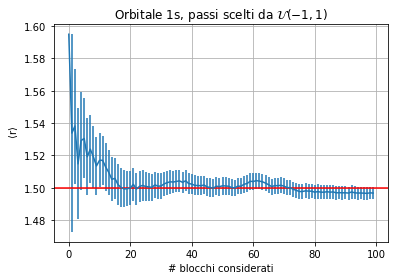

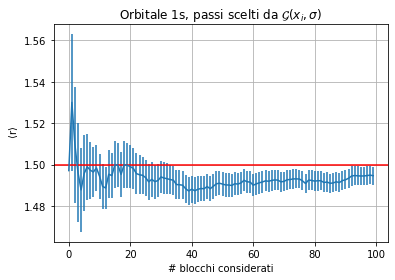

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.table import Table

Names = np.array(["mean_1sflat","errs_1sflat","mean_2sflat","errs_2sflat","mean_1sgauss","errs_1sgauss","mean_2sgauss","errs_2sgauss"])
datas = Table.read("Results.txt",format="ascii",names=Names)

mean_1sflat=np.array(datas["mean_1sflat"])
errs_1sflat=np.array(datas["errs_1sflat"])

N = len(mean_1sflat)
x = np.arange(N)

plt.errorbar(x,mean_1sflat,yerr=errs_1sflat)
plt.title("Orbitale 1s, passi scelti da $\mathcal{U}(-1,1)$")
plt.xlabel("# blocchi considerati")
plt.ylabel(" $\mathrm{ \langle r \\rangle} $ ")
plt.axhline(1.5,color="r")
plt.grid(True)
plt.show()

mean_1sgauss=np.array(datas["mean_1sgauss"])
errs_1sgauss=np.array(datas["errs_1sgauss"])
plt.errorbar(x,mean_1sgauss,yerr=errs_1sgauss)
plt.title("Orbitale 1s, passi scelti da $\mathcal{G}(x_i,\sigma)$")
plt.xlabel("# blocchi considerati")
plt.ylabel(" $\mathrm{ \langle r \\rangle} $ ")
plt.axhline(1.5,color="r")
plt.grid(True)
plt.show()

Si nota che in questo caso i risultati ottenuti sono vicini a quelli teorici, in entrambi i casi sono a circa un $\sigma$ di distanza. Le incertezze risultano lievemente minori nel caso della distribuzione uniforme, anche se non sono riuscito a dare una spiegazione precisa a questo risultato. Infatti, nella simulazione successiva questa differenza risulta assente.

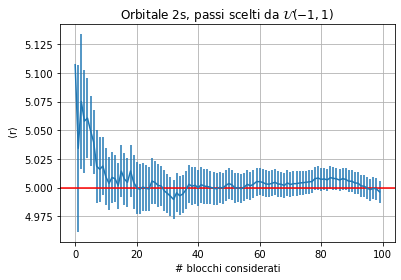

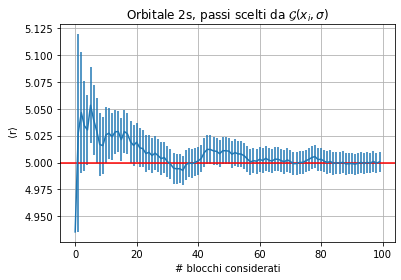

In [18]:
mean_2sflat=np.array(datas["mean_2sflat"])
errs_2sflat=np.array(datas["errs_2sflat"])

plt.errorbar(x,mean_2sflat,yerr=errs_2sflat)
plt.title("Orbitale 2s, passi scelti da $\mathcal{U}(-1,1)$")
plt.xlabel("# blocchi considerati")
plt.ylabel(" $\mathrm{ \langle r \\rangle} $ ")
plt.axhline(5,color="r")
plt.grid(True)
plt.show()

mean_2sgauss=np.array(datas["mean_2sgauss"])
errs_2sgauss=np.array(datas["errs_2sgauss"])
plt.errorbar(x,mean_2sgauss,yerr=errs_2sgauss)
plt.title("Orbitale 2s, passi scelti da $\mathcal{G}(x_i,\sigma)$")
plt.xlabel("# blocchi considerati")
plt.ylabel(" $\mathrm{ \langle r \\rangle} $ ")
plt.axhline(5,color="r")
plt.grid(True)
plt.show()

In questo caso si nota un accordo ancora migliore con il risultato teorico (in entrambi i casi al di sotto di un $\sigma$) e non si nota alcuna differenza relativa ai due metodi usati per la scelta dei nuovi passi. Questo mi porta a dire che i due metodi utilizzati danno risultati equivalenti.

Ho poi cercato nuovamente il valore di $\langle r \rangle_{2s}$ usando la distribuzione gaussiana partendo però da un punto con probabilità molto bassa, in modo da vedere dopo quanti passi l'algoritmo sarebbe tornato verso i punti a probabilità più alta. 
Per questo motivo ho scelto come punto di partenza $x_1 = x_2 = x_3 = 100 \ a_0$ . Ho quindi compiuto $10^6$ passi seguendo l'algoritmo di Metropolis e qui sotto si possono vedere i risultati ottenuti:

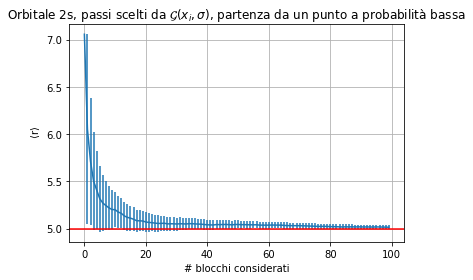

In [17]:
Nomi = ["mean_farstart","errs_farstart"]
farstart_datas = Table.read("Farstart.txt",format="ascii",names=Nomi)

mean_farstart = np.array(farstart_datas["mean_farstart"])
errs_farstart = np.array(farstart_datas["errs_farstart"])
plt.errorbar(x,mean_farstart,yerr=errs_farstart)
plt.title("Orbitale 2s, passi scelti da $\mathcal{G}(x_i,\sigma)$, partenza da un punto a probabilità bassa")
plt.xlabel("# blocchi considerati")
plt.ylabel(" $\mathrm{ \langle r \\rangle} $ ")
plt.axhline(5,color="r")
plt.grid(True)
plt.show()

Si può notare dall'elevato errore dei primi blocchi che l'algoritmo converge in modo abbastanza rapido verso il valore a probabilità più alta di $r$, ma è necessario un numero elevato di iterazioni perchè il valore medio tenda ad arrivare a valori corretti. Comunque, posso concludere che l'algoritmo si è comportato come previsto, arrivando dopo un numero sufficiente di passi al valore corretto di $ \langle r \rangle $.